# Download an ImageNette dataset

In [131]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [132]:
from fastai2.vision.all import *
from nbdev.showdoc import *

In [133]:
print(torch.__version__)

1.4.0


In [134]:
import fastai2
fastai2.__version__

'0.0.11'

## Downloading the Camvid dataset

In [57]:
# path = untar_data(URLs.IMAGENETTE_160)
# path

In [136]:
path = untar_data(URLs.CAMVID)
path.ls()

(#4) [Path('/Users/sebastian/.fastai/data/camvid/images'),Path('/Users/sebastian/.fastai/data/camvid/labels'),Path('/Users/sebastian/.fastai/data/camvid/codes.txt'),Path('/Users/sebastian/.fastai/data/camvid/valid.txt')]

In [59]:
path.parent.ls()

(#17) [Path('/Users/sebastian/.fastai/data/camvid'),Path('/Users/sebastian/.fastai/data/imdb_sample.tgz'),Path('/Users/sebastian/.fastai/data/imagenette-160.tgz'),Path('/Users/sebastian/.fastai/data/is_img_rotated'),Path('/Users/sebastian/.fastai/data/camvid_tiny'),Path('/Users/sebastian/.fastai/data/mnist_tiny'),Path('/Users/sebastian/.fastai/data/mnist_sample.tgz'),Path('/Users/sebastian/.fastai/data/coco_tiny'),Path('/Users/sebastian/.fastai/data/mnist.pkl.gz'),Path('/Users/sebastian/.fastai/data/imagenette2-160')...]

In [135]:
# shutil.rmtree(path.parent/'is_img_rotated')

In [61]:
path.ls()

(#4) [Path('/Users/sebastian/.fastai/data/camvid/images'),Path('/Users/sebastian/.fastai/data/camvid/labels'),Path('/Users/sebastian/.fastai/data/camvid/codes.txt'),Path('/Users/sebastian/.fastai/data/camvid/valid.txt')]

## Create rotated duplicates of the data

In [62]:
path.parent

Path('/Users/sebastian/.fastai/data')

In [63]:
path_dataset = path.parent/'is_img_rotated'
path_dataset.mkdir(parents=True, exist_ok=True)
path_straight = path_dataset/'straight'
path_straight.mkdir(parents=True, exist_ok=True)
path_rot180 = path_dataset/'rotated180'
path_rot180.mkdir(parents=True, exist_ok=True)
path_rot90 = path_dataset/'rotated90'
path_rot90.mkdir(parents=True, exist_ok=True)
path_rot270 = path_dataset/'rotated270'
path_rot270.mkdir(parents=True, exist_ok=True)

In [65]:
path_dataset.ls()

(#4) [Path('/Users/sebastian/.fastai/data/is_img_rotated/straight'),Path('/Users/sebastian/.fastai/data/is_img_rotated/rotated180'),Path('/Users/sebastian/.fastai/data/is_img_rotated/rotated270'),Path('/Users/sebastian/.fastai/data/is_img_rotated/rotated90')]

In [67]:
## Uncomment when running the first time
shutil.rmtree(path_straight)
shutil.copytree(path/'images', path_straight)
# shutil.copytree(path/'val', path_straight/'val')

Path('/Users/sebastian/.fastai/data/is_img_rotated/straight')

In [68]:
path_straight.ls()

(#702) [Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0001TP_009030.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0001TP_008460.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0016E5_08490.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0016E5_06330.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0006R0_f02550.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0001TP_009540.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/Seq05VD_f03270.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0016E5_02340.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0016E5_08137.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0001TP_006840.png')...]

In [69]:
il = get_image_files(path_straight)
il

(#701) [Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0001TP_009030.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0001TP_008460.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0016E5_08490.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0016E5_06330.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0006R0_f02550.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0001TP_009540.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/Seq05VD_f03270.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0016E5_02340.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0016E5_08137.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0001TP_006840.png')...]

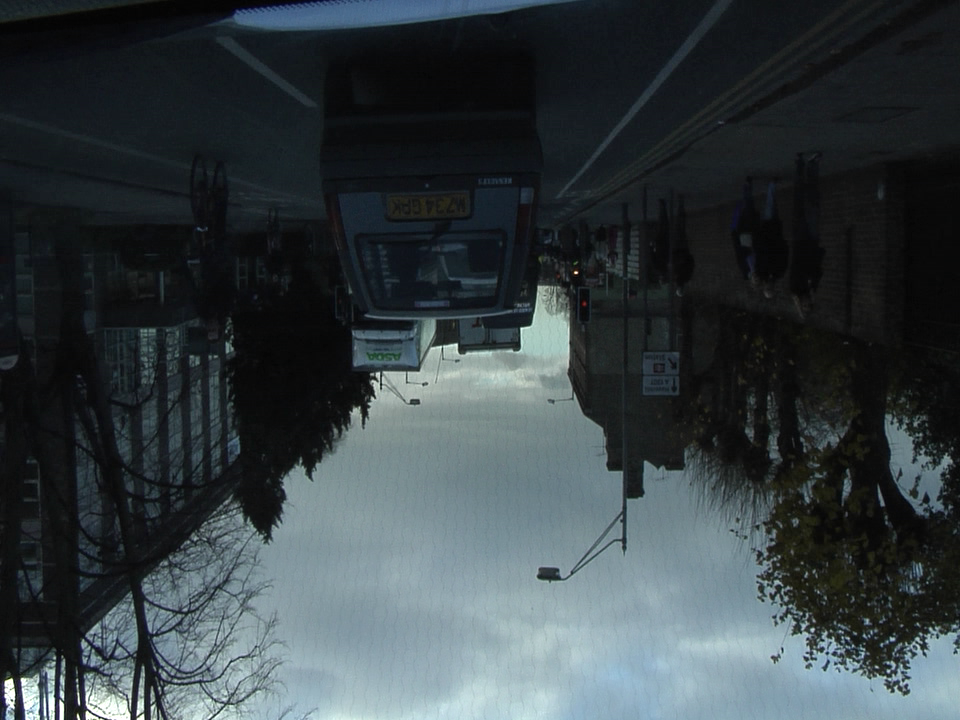

In [70]:
img = Image.open(il.items[5])
img.rotate(180)

In [75]:
def rotateImage(fn, path, angleDeg=90):
    dest = path/fn.relative_to(path_straight)
    dest.parent.mkdir(parents=True, exist_ok=True)
    img = Image.open(fn)
    flipped_img = img.rotate(angleDeg)
    flipped_img.save(dest, quality=60)
#     return flipped_img

rotateImage(il.items[5], path_rot180, angleDeg=180)

In [76]:
(path_rot180).ls()

(#1) [Path('/Users/sebastian/.fastai/data/is_img_rotated/rotated180/0001TP_009540.png')]

In [77]:
## Uncomment when running the first time
parallel(partial(rotateImage, path=path_rot180, angleDeg=180), il.items)
parallel(partial(rotateImage, path=path_rot90, angleDeg=90), il.items)
parallel(partial(rotateImage, path=path_rot270, angleDeg=270), il.items)

(#701) [None,None,None,None,None,None,None,None,None,None...]

In [79]:
(path_rot90).ls()

(#701) [Path('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/0001TP_009030.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/0001TP_008460.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/0016E5_08490.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/0016E5_06330.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/0006R0_f02550.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/0001TP_009540.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/Seq05VD_f03270.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/0016E5_02340.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/0016E5_08137.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/rotated90/0001TP_006840.png')...]

## Create databunch v2

In [137]:
il = get_image_files(path_dataset)
il

(#2804) [Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0001TP_009030.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0001TP_008460.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0016E5_08490.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0016E5_06330.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0006R0_f02550.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0001TP_009540.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/Seq05VD_f03270.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0016E5_02340.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0016E5_08137.png'),Path('/Users/sebastian/.fastai/data/is_img_rotated/straight/0001TP_006840.png')...]

In [172]:
init_sz = 64
bs = 32

In [173]:
items = get_image_files(path_dataset)
# split_idx = GrandparentSplitter(valid_name='val')(items)

In [174]:
# valid_fn = lambda o: (o.parts if isinstance(o, Path) else o.split(os.path.sep))[-3]=='val'
# valid_fn(il.items[5])

In [175]:
def lbl_fn(o):
    tmp = (o.parts if isinstance(o, Path) else o.split(os.path.sep))
    return tmp[-2]

lbl_fn(il.items[-1])

'rotated90'

In [176]:
# lbl_fn = lambda o: (o.parts if isinstance(o, Path) else o.split(os.path.sep))[-2]
# lbl_fn(il.items[-1])

In [177]:
# item_tfms = [ToTensor, FlipItem(0), RandomResizedCrop(128, min_scale=0.35)]
batch_tfms=[*aug_transforms(size=(360,480), do_flip=False), Normalize.from_stats(*imagenet_stats)]

In [187]:
camvid = DataBlock(blocks = (ImageBlock(cls=PILImage),CategoryBlock),
                    get_items = get_image_files,
                    splitter = RandomSplitter(valid_pct=0.1),
                    get_y = parent_label,
                    batch_tfms=batch_tfms)

# dataset = DataBlock(blocks = (ImageBlock(cls=PILImage),CategoryBlock),
#                     get_items = get_image_files,
#                     splitter = valid_fn,
#                     get_y = lbl_fn)

In [188]:
dsets = camvid.datasets(path_dataset)

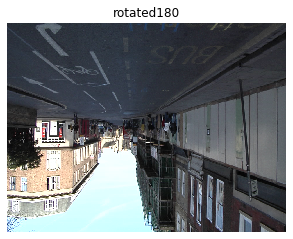

In [189]:
x,y = dsets.train[random.randint(0,20)]
show_at(dsets.train, 4, cmap='Greys');


In [190]:
path_dataset

Path('/Users/sebastian/.fastai/data/is_img_rotated')

In [191]:
dls = camvid.dataloaders(path_dataset, bs=8, path=path_dataset)

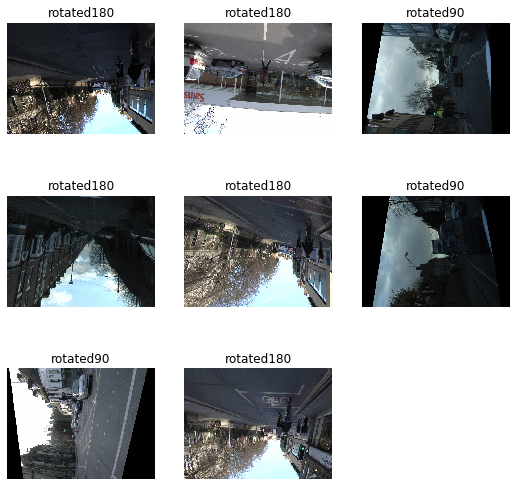

In [192]:
dls.show_batch(max_n=18)

## Training

In [198]:
learn = cnn_learner(dls, arch=resnet18, metrics=accuracy)

In [199]:
learn.load('stage-1')

(0.006918309628963471, 3.019951861915615e-07)

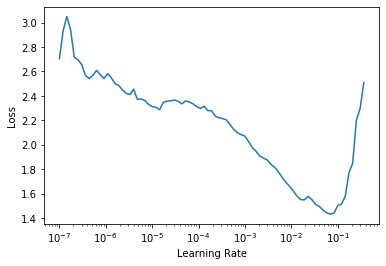

In [124]:
learn.lr_find()
# learn.recorder.plot()

In [125]:
learn.fit_one_cycle(1,lr_max=1e-2)

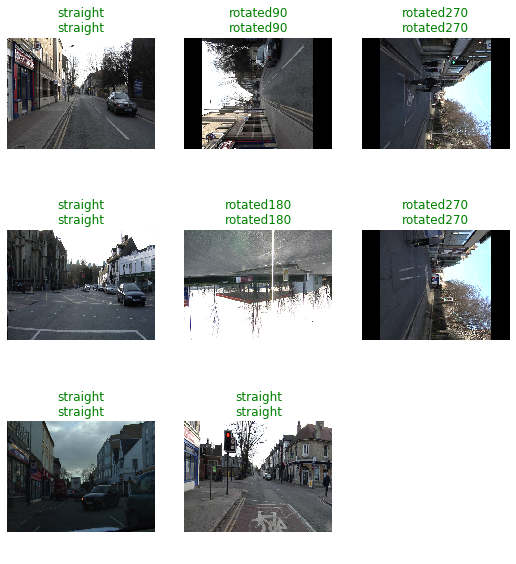

In [195]:
learn.show_results()

In [155]:
learn.export??

In [200]:
learn.export('/Users/sebastian/Development/deep-learning/Derotate/training/models/is_img_rotated.pkl')

In [127]:
learn.save('stage-1')

In [129]:
learn.load('stage-1')

In [44]:
tfmable = ll.transform(tfms, size=2*init_sz)

In [53]:
learn.data = tfmable.databunch(bs=bs, num_workers=0).normalize()

In [55]:
learn.unfreeze()

In [56]:
learn.fit_one_cycle(1,max_lr=slice(1e-5,1e-3))

In [58]:
learn.save('stage-2')

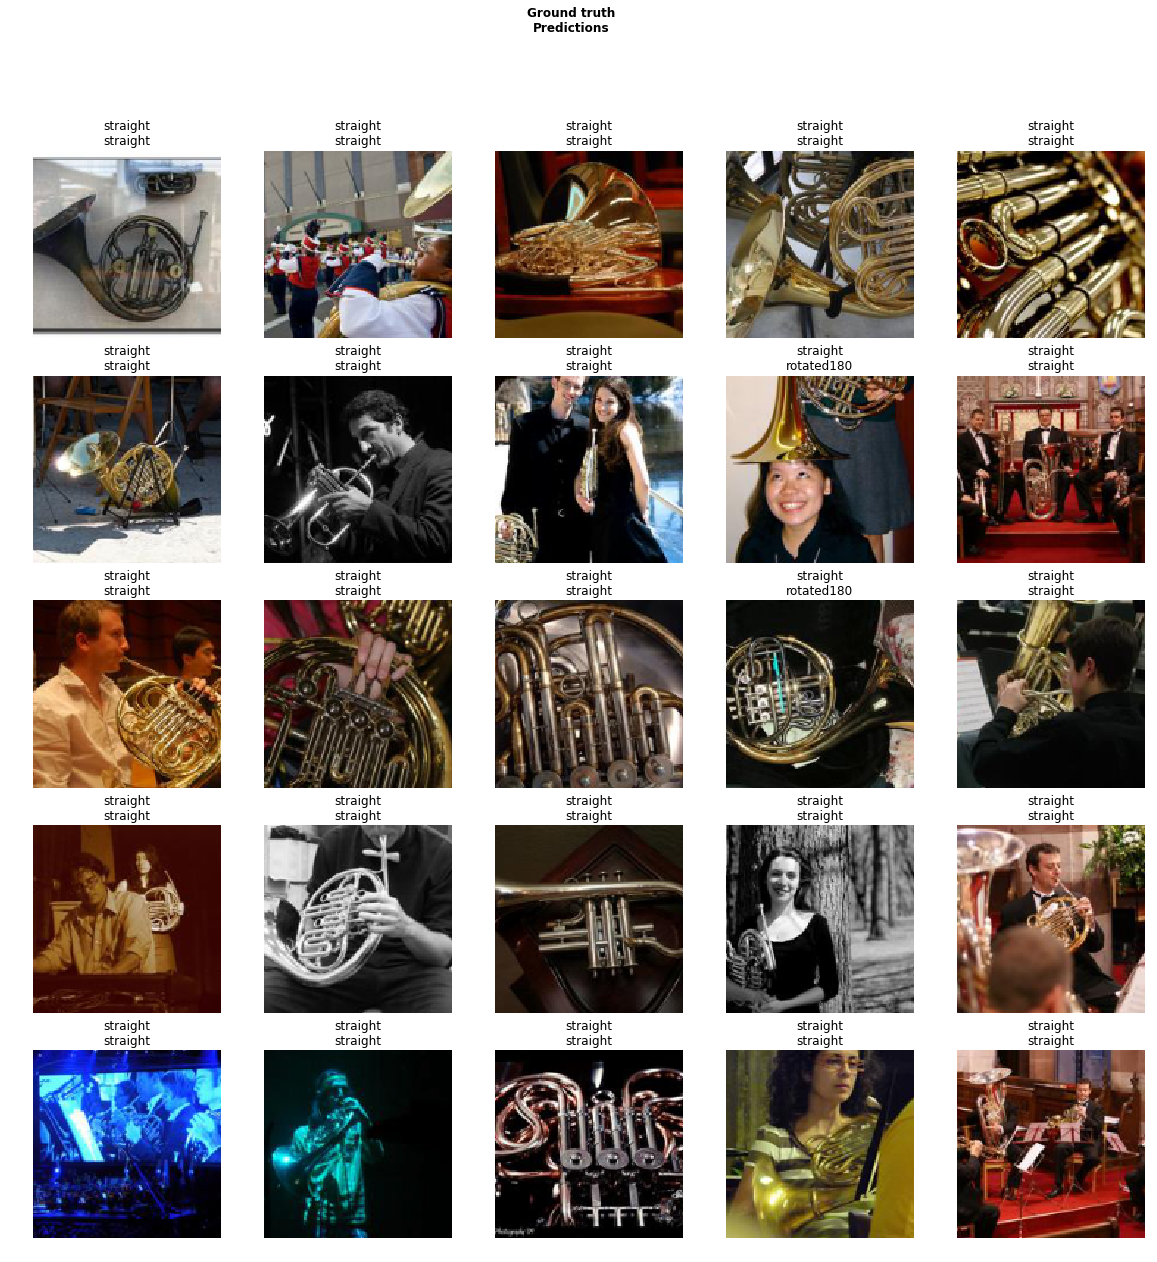

In [59]:
learn.show_results()

In [57]:
learn.export('/Users/sebastian/Development/deep-learning/is-img-rotated/app/models/isImgRotated-rn18-sz128.pkl')

## Results

In [60]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

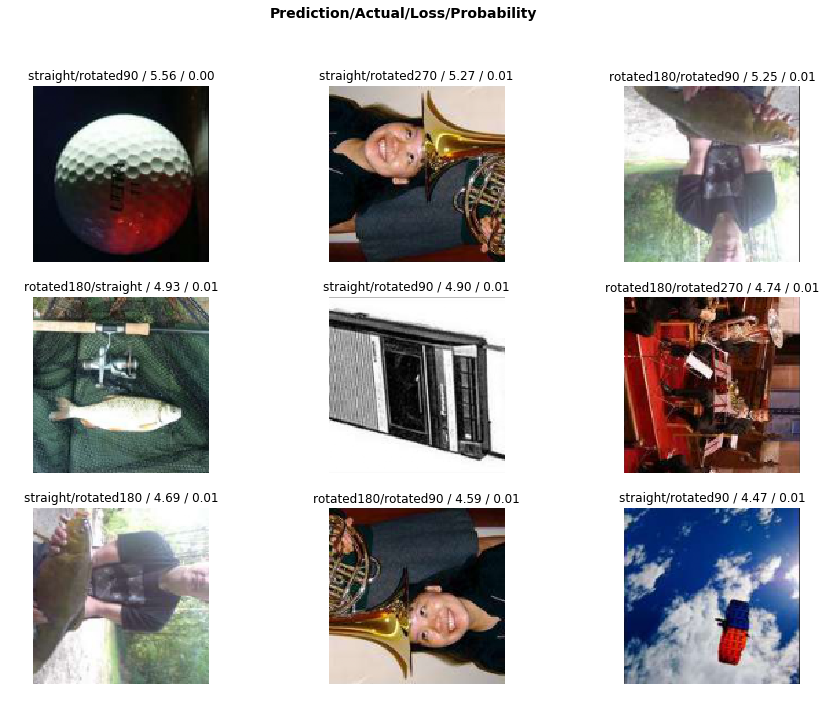

In [61]:
interp.plot_top_losses(9, figsize=(15,11))

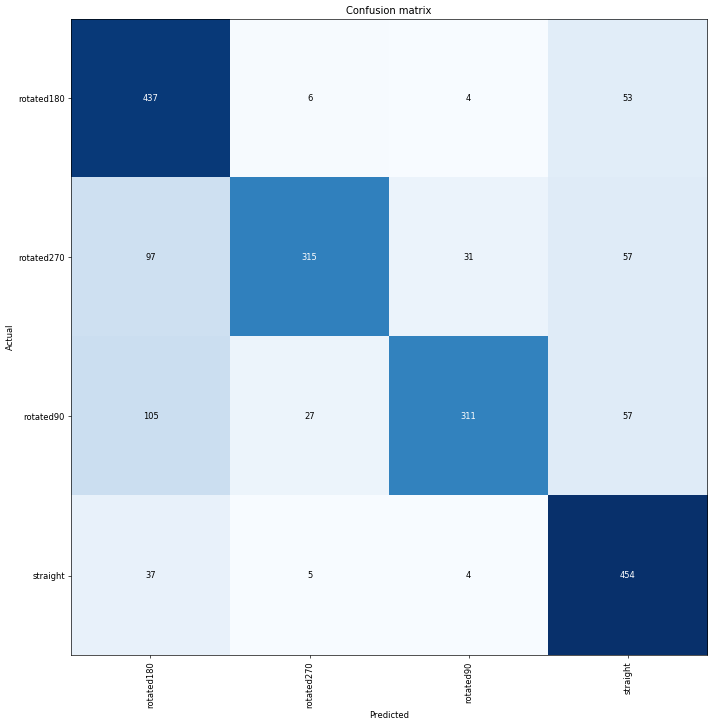

In [62]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [64]:
interp.most_confused(min_val=2)

[('rotated90', 'rotated180', 105),
 ('rotated270', 'rotated180', 97),
 ('rotated270', 'straight', 57),
 ('rotated90', 'straight', 57),
 ('rotated180', 'straight', 53),
 ('straight', 'rotated180', 37),
 ('rotated270', 'rotated90', 31),
 ('rotated90', 'rotated270', 27),
 ('rotated180', 'rotated270', 6),
 ('straight', 'rotated270', 5),
 ('rotated180', 'rotated90', 4),
 ('straight', 'rotated90', 4)]

## Test in production

In [65]:
# learn = load_learner(Path('/Users/sebastian/Development/deep-learning/is-img-rotated/app/models/'),
#                      'isImgRotated-dn121-sz128.pkl')
learn = load_learner(Path('/Users/sebastian/Development/deep-learning/is-img-rotated/app/models/'),
                     'isImgRotated-rn18-sz128.pkl')

In [6]:
# learn.load('stage-2')

In [66]:
url = 'https://media.wired.com/photos/598e35fb99d76447c4eb1f28/master/pass/phonepicutres-TA.jpg'
# url = 'https://images.unsplash.com/photo-1486673748761-a8d18475c757?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80'
path_local = Path('/Users/sebastian/Development/deep-learning/is-img-rotated/')
download_url(url,path_local/'img_test.jpg',overwrite=True)


In [68]:
img_test = open_image(path_local/'img_test.jpg')

In [69]:
## We only rotate by 90 each time because rotating applies also on the original image
img_test = open_image(path_local/'img_test.jpg')
img_rotated90 = img_test.rotate(90)
img_rotated90.save(path_local/'img_test_rotated90.jpg')
img_rotated180 = img_test.rotate(90)
img_rotated180.save(path_local/'img_test_rotated180.jpg')
img_rotated270 = img_test.rotate(90)
img_rotated270.save(path_local/'img_test_rotated270.jpg')

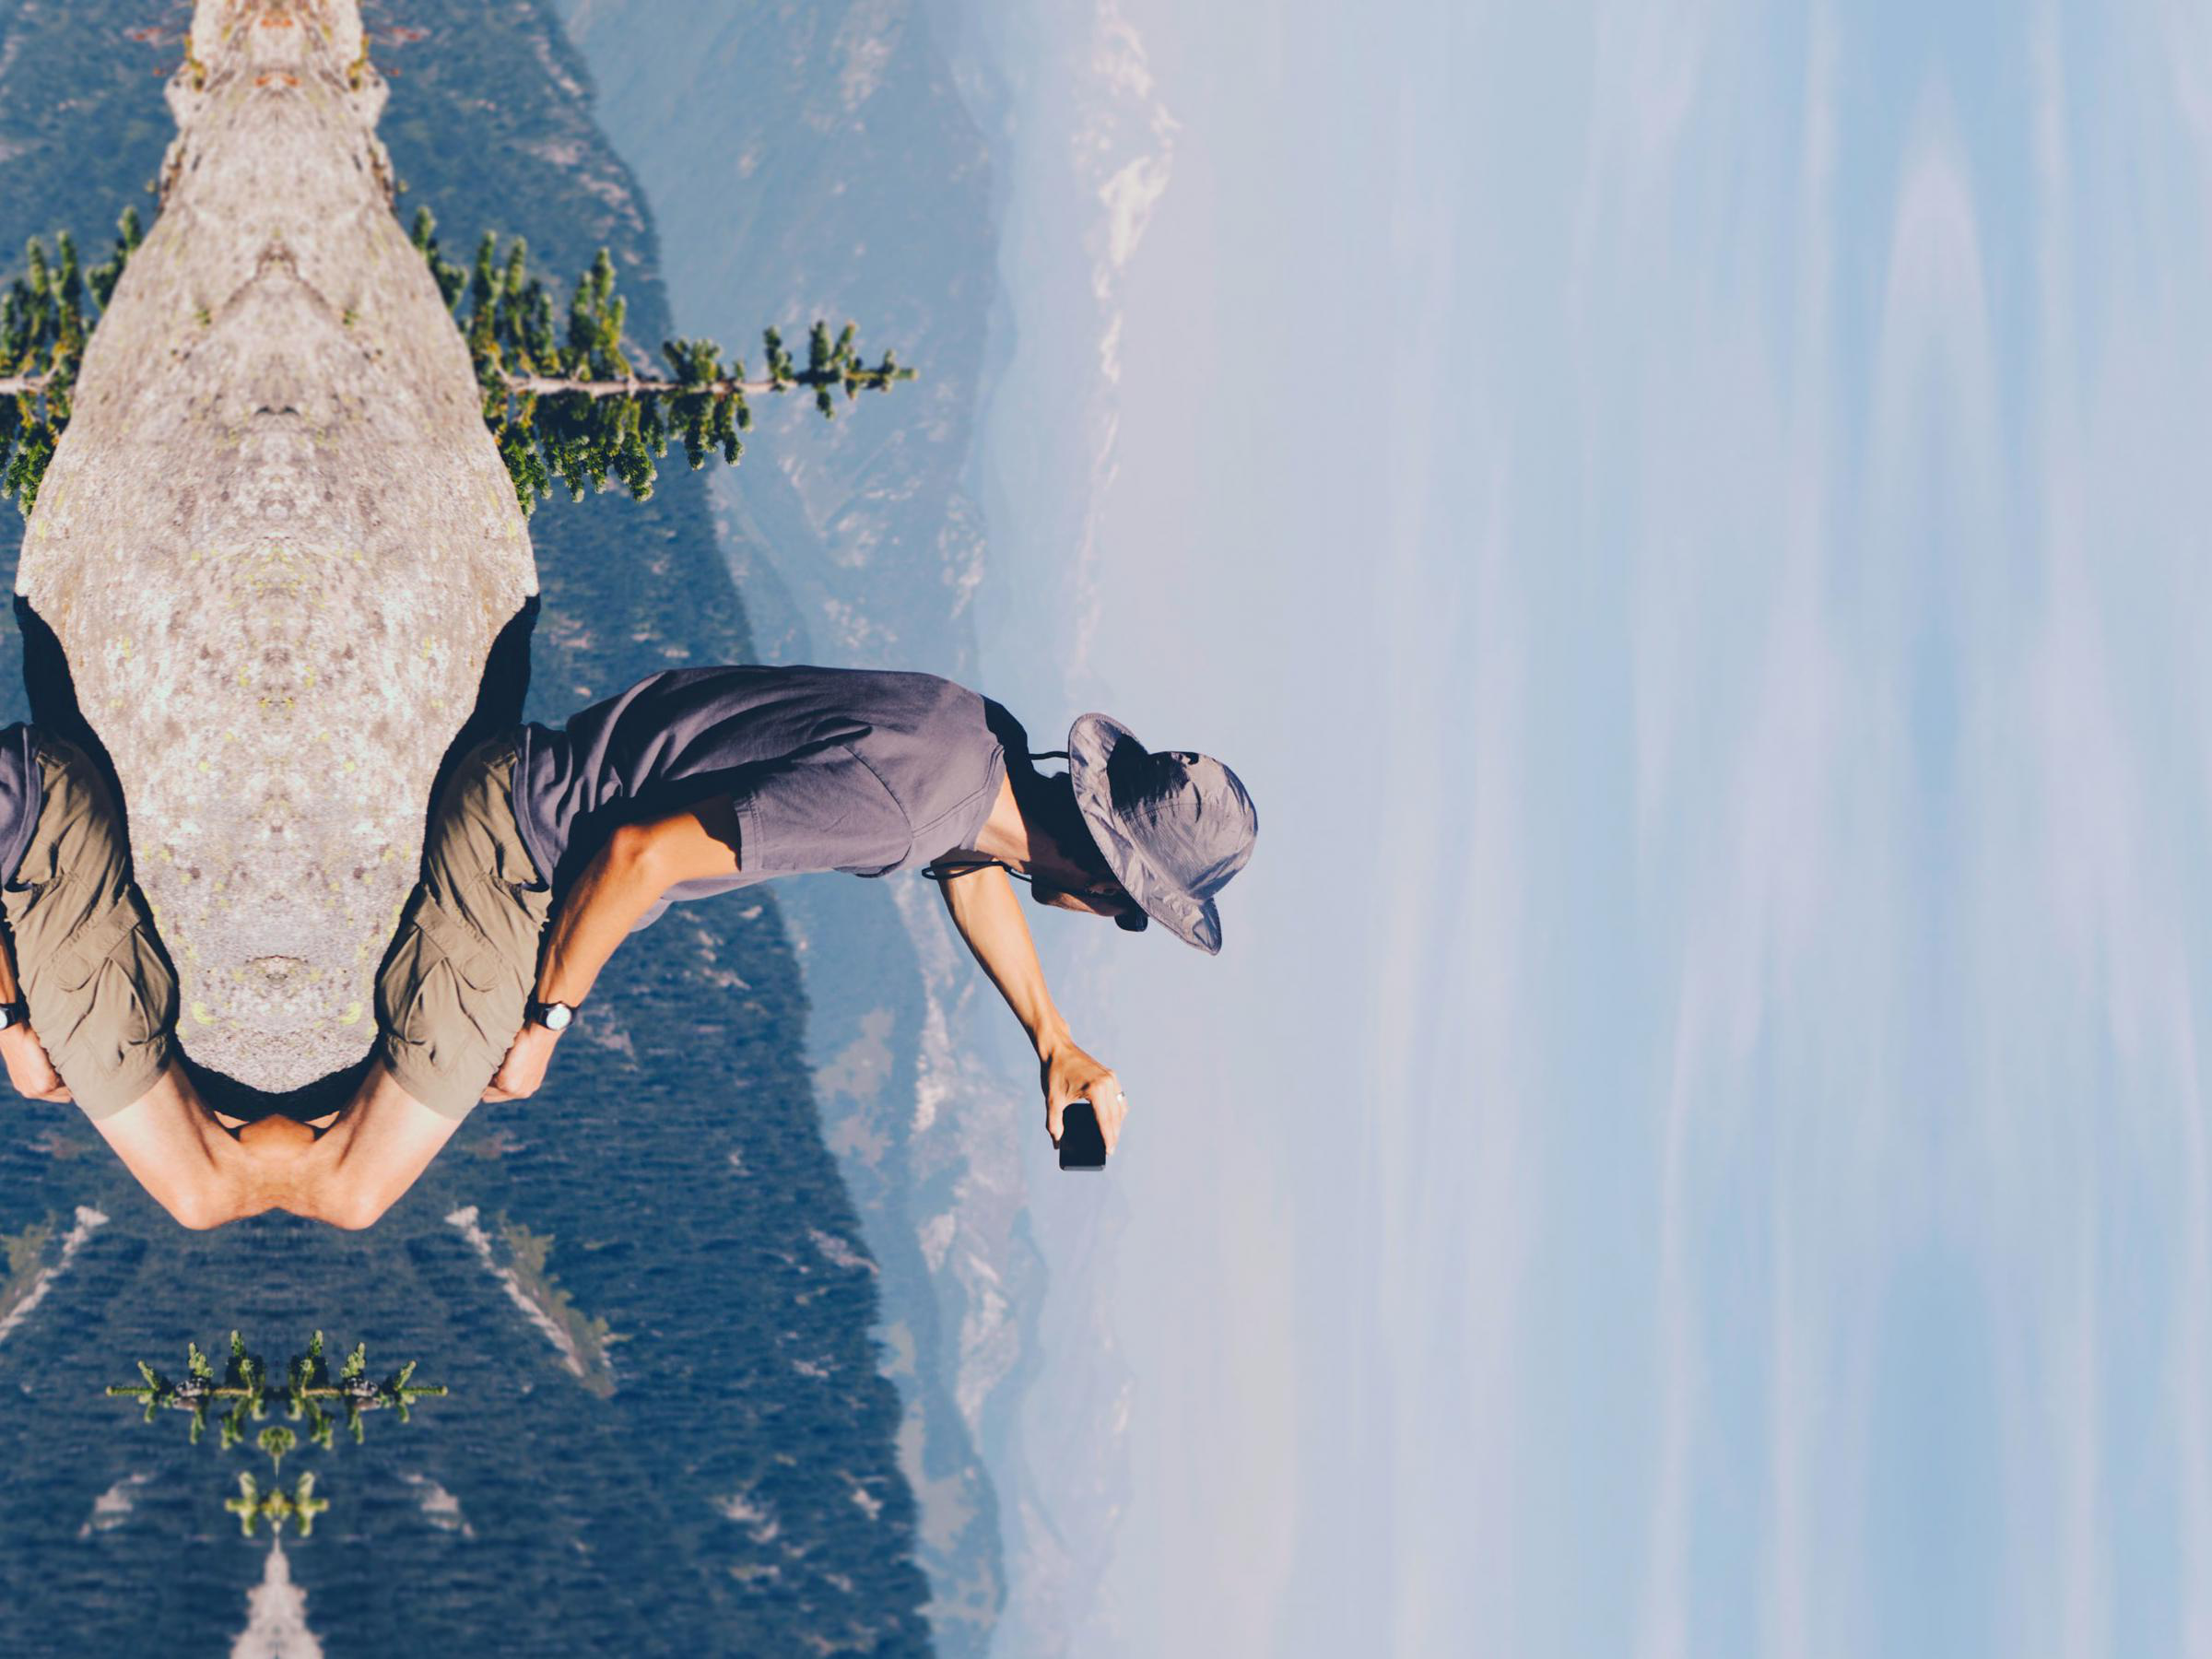

In [76]:
img = open_image(path_local/'img_test_rotated270.jpg')
img

In [77]:
learn.predict(img)

(Category rotated270, tensor(1), tensor([0.2302, 0.5013, 0.0237, 0.2448]))